# Lab 11. Unsupervized learning

#### Table of contents

1. Overview
2. K-means
3. Application of K-means to categorize car engines
4. PCA
5. Application of PCA to reduce input dimension

## 1. Overview

During this lab session you will write the codes for K-means and PCA and explore some applications.

## 2. K-means

As discussed in class, K-means algorithm proceeds in the following steps:

- initialize the centroid positions
- assign clusters index to each example
- move centroids
- loop

You will write the code for each of these steps. The K-means main code that will call each of the step can be found few blocks below for reference. We provide below the code to initialize centroids positions to random examples. Although we will see an example with 2-dimensional input data, the code must be general and must work with $n$-dimensional input data. 

In [3]:
import random
import numpy as np

def init_centroids(X, K):
    m, n = X.shape
    # We pick randomely the index of K data points
    idx = random.sample(range(m),K)
    # We return the corresponding data as the initial centroid positions
    return X[idx,:]

We will implement the cluster assignment step with a double loop. The first loop will go over data points and the second loop will go over clusters. The idea is that for each data example, we will create a list of square distances (`d2_list`) with respect to each cluster position. For a given example $i$, an element of the list `d2_list` will be:

$d2_k = \sum_{j=0}^n (X^{(i)}_j-K_j^{(k)})^2$

with $n$ the dimension of the input feature (number of features), $X^{(i)}_j$ the $j$ component of input example $i$ and $K_j^{(k)}$ the $j$ component of the centroid of cluster $k$. For each example, we will then store the minimum argument of the `d2_list` (i.e. the index of the cluster it is closest to) in the list `idx`.

__Q.1.__ Complete the function `cluster_assignment` that returns the list `idx` corresponding to indices of the closest cluster centroid to each data point. The function takes in the data points `X` of shape ($m$,$n$) with $m$ the number of examples and $n$ the number of features (i.e. the dimension of the data), and the variable `centroids` that contains the coordinates of the centroids ($n$-dimensional) (2 marks).

In [14]:
def cluster_assignment(X, centroids):
    m, n = X.shape
    idx = []
    for i in range(m):
        Xi = X[i,:]
        d2_list = []
        ### BEGIN SOLUTION
        ### END SOLUTION
        idx.append(np.argmin(d2_list))
    return idx

We will now implement the move centroid step with two loops and an `if` condition. Move centroid computes the average of input values that belong to each cluster centroid. For each cluster centroid, we will go over each input examples and check whether it belongs to this specific cluster centroid. If the data point belongs to the cluster centroid, we will add its contributions to the array `avex` ($n$-dimensional). Once we have accumulated the contributions of every data point that belong to a given cluster centroid, we need to divide by the number of data points that was accumulated to get an averaged. 

__Q.2.__ Complete the function `move_centroids` that returns the new position of the centroids based on the averaged position of the data points that belong to each centroid. The function takes in the data points `X`, the array `idx` of indices of the centroid each data point belongs to, and the number of clusters `K` (2 marks).

In [15]:
def move_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K,n))
    for k in range(K):
        avex = np.zeros((1,n))
        ### BEGIN SOLUTION
        ### END SOLUTION
        centroids[k,:] = avex
    return centroids

We provide below the function `compute_cost` that computes the cost function corresponding to some given data and centroids. This can be useful to compare the performance of K-means with various $K$ values.

In [16]:
def compute_cost(X, centroids, idx):
    cost = 0
    m, n = X.shape
    K, n = centroids.shape
    for k in range(K):
        Kj = centroids[k]
        for i in range(m):
            Xi = X[i,:]
            if idx[i] == k:
                d2 = sum((Xi-Kj)**2)
                cost += d2
    return cost/K

Finally, we provide the code for the K-means algorithm. As discussed above, K-means calls successively the functions `cluster_assignment` and `move_centroids` and evaluates the cost of the final model. K-means takes in the number of cluster, the input data and the number of iterations.

In [17]:
def K_means(K,X,niters):
    random.seed(30)
    centroids = init_centroids(X, K)
    for niter in range(niters):
        idx = cluster_assignment(X, centroids)
        centroids = move_centroids(X, idx, K)
    cost = compute_cost(X, centroids, idx)
    return centroids,idx,cost

## 3. Application of K-means to categorize car engines

Let's imagine you are a car manufacturer and you would like to create car categories based on various engine properties for the car you sell. Let's load some data about car/engine properties.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

c0 = pd.read_csv('cars.csv')
c1 = c0.dropna()
c1.head()

,MPG,Cylinder,Displacement,HP,Weight,Acceleration,Year,Origin,Name
0,18.0,8,307.0,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1,"""ford torino"""


Let say we just want to create categories based on the car acceleration and the engine displacement. We can therefore define the input data as follow:

In [19]:
target = ['Acceleration','Displacement']
X = c1[target].to_numpy()
print(X.shape)

(392, 2)


Let's have a look at the data.

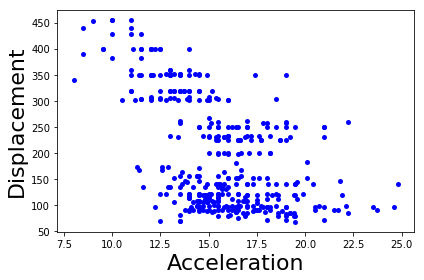

In [20]:
plt.scatter(X[:,0],X[:,1],lw=0,marker='.',c='b',s=100)
plt.xlabel('Acceleration',fontsize=22)
plt.ylabel('Displacement',fontsize=22)
plt.tight_layout()
plt.show()

We can see that there is some mild structure in the data. Let's try with 2 clusters.

In [21]:
K = 2
niters = 50
centroids,idx,cost = K_means(K,X,niters)
print('Final cost:',cost)

Final cost: 434759.39214189124


We can plot the result including the original data, the centroids and color data points to the closest centroids.

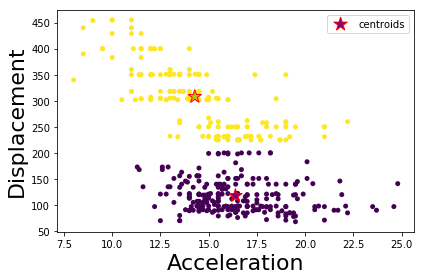

In [22]:
plt.scatter(X[:,0],X[:,1],lw=0,marker='.',c=idx,s=100)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,color=['purple','y'],edgecolors='r',label='centroids')
plt.xlabel('Acceleration',fontsize=22)
plt.ylabel('Displacement',fontsize=22)
plt.legend()
plt.tight_layout()
plt.savefig('Figure.pdf')
plt.show()

We can indeed separate data with 2 categories however, you would like to know if there is a better choice of number of clusters. One way to decide is to try various number of clusters and compare the final cost. Of course, the larger the number of clusters, the lowest the cost, and you can imagine in the limit the number of clusters equal the number of data points (i.e. $K = m$) a zero cost. A good way to proceed is to apply the elbow method. In the elbow method, you compute the cost for various number of clusters and select the optimal number of clusters based on the change in slope of the cost with respect to the number of clusters curve. The optimal number of clusters is located at the elbow of the curve. The elbow is characterized by the largest number of clusters for which you observe a dramatic change in the cost. Let's apply K-means to the car dataset with various number of clusters from 2 to 8, compute the cost for each and plot the corresponding cost as a function of number of clusters.

Number of clusters 2  >>> Cost 434759.39214189124
Number of clusters 3  >>> Cost 119008.1409268707
Number of clusters 4  >>> Cost 64889.93168558293
Number of clusters 5  >>> Cost 47054.95493574269
Number of clusters 6  >>> Cost 38658.803718263895
Number of clusters 7  >>> Cost 32472.58063049502
Number of clusters 8  >>> Cost 27703.073103953506


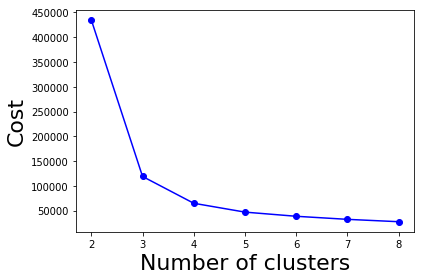

In [24]:
cost_list = []
K_list = [2,3,4,5,6,7,8]
niters = 50
for K in K_list:
    centroids,idx,cost = K_means(K,X,niters)
    cost_list.append(cost)
    print('Number of clusters',K,' >>> Cost',cost)
    
plt.plot(K_list,cost_list,marker='o',c='b')
plt.xlabel('Number of clusters',fontsize=22)
plt.ylabel('Cost',fontsize=22)
plt.tight_layout()
plt.show()

__Q.3.__ Based on the elbow method, what is the value of the optimal number of clusters? Assign the variable `K` to the optimal number of clusters (1 mark).

In [25]:
### BEGIN SOLUTION
### END SOLUTION
centroids,idx,cost = K_means(K,X,niters)
print(cost)

119008.1409268707


Let's plot the data based on the optimal number of clusters you selected.

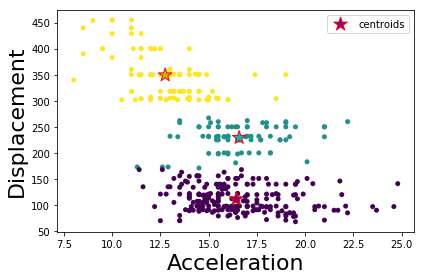

In [26]:
plt.scatter(X[:,0],X[:,1],lw=0,marker='.',c=idx,s=100)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,color=['purple','c','y'],edgecolors='r',label='centroids')
plt.xlabel('Acceleration',fontsize=22)
plt.ylabel('Displacement',fontsize=22)
plt.legend()
plt.tight_layout()
plt.savefig('Figure.pdf')
plt.show()

## 4. PCA

We propose now to write codes to perform PCA, project the data to the low dimensional space and reconstruct data. The PCA algorithm is quite straightforward. We first need to build the covariance matrix defined as:

$\Sigma = \frac{1}{m} (X^T\cdot X)$

with $X$ the input data of shape ($m$,$n$) with $m$ number of examples and $n$ the number of features ($n$-dimensional). 
The covariance matrix is a square matrix of size $n\times n$.
The directions $v$ of the PCA are given by the eigenvectors of the covariance matrix.
The eigenvector matrix is of shape $n\times n$.
To project the data into the low dimensional space $K$ ($K<n$) one simply needs to compute:

$Z^{(i)} = v_K^T\cdot X^{(i)}$

with $v_K$ the $K$ first eigenvectors ordered based on the eigenvalues $w$ of the covariance matrix. The original (approximated) $\tilde{X}$ data can be recovered as:

$\tilde{X}^{(i)} = v_K\cdot Z^{(i)}$

__Q.4.__ Complete the function `my_pca` below. You must define the variable `Sigma` that contains the covariance matrix. The function takes in the input data $X$ of shape (m,n) as well as an optional boolean parameter that tells if you want to print the % of variance retained for each eigenvalue. The function returns the eigenvalues and eigenvectors of the covariance matrix computed with the library `linalg` of `numpy` (1 mark).

In [28]:
from numpy import linalg as LA

def my_pca(X,print_var=True):
    m,n = X.shape
    ### BEGIN SOLUTION
    ### END SOLUTION
    # Here we compute the eigenvalues/eigenvectors
    w, v = LA.eigh(Sigma)
    # We now sort the eigenvectors based on the eigenvalues
    idx = w.argsort()[::-1]  
    w = w[idx]
    v = v[:,idx]
    # We print the % variance retained is boolean is True
    for k in range(1,n):
        if print_var: print("k=",k,sum(w[:k])/sum(w),"variance retained")
    return w,v

Note that the normalized (unit length) eigenvectors are returned from `linalg` such that the column `v[:,i]` is the ith eigenvector corresponding to the eigenvalue `w[i]`. Therefore, $v_K$ (including the $K$ first eigenvectors) corresponds to `v[:,:K]`.

__Q.5.__ Complete the function `project_data` that returns the projected data into the low dimensional space $Z$. The function takes in the original data `X`, the (ordered) eigenvectors `v` and the size of the low dimensional space `K`. For each training example (use a for loop) you must compute the dot product between the transpose of the troncated eigenvectors $v_K$ ($K\times n$ matrix) with the input example (of size $n\times 1$). The function returns the `Z` matrix of size $m\times K$ (3 marks). 

In [29]:
def project_data(X,v,K):
    m,n = X.shape
    Z = np.zeros((m, K))
    ### BEGIN SOLUTION
    ### END SOLUTION
    return Z

__Q.6.__ Complete the function `recover_data` that returns the recovered data `X_rec`. The function takes in the projected data in the low dimesional space `Z`, the eigenvectors `v` and the size of the low dimesional space `K`. Similar to the previous function, for each training example (use a for loop) you must compute the dot product between the  troncated eigenvectors $v_K$ ($n\times K$ matrix) with the projected data $Z$ (of size $K\times 1$). The final `X_rec` matrix will be of size $m\times n$ (3 marks).

In [40]:
def recover_data(Z,v,K):
    m,_ = Z.shape
    n,_ = v.shape
    X_rec = np.zeros((m,n))
    ### BEGIN SOLUTION
    ### END SOLUTION
    return X_rec

To debug your code you can try the example below. We first generate some 2D data $X$ (of size $100\times 2$) and plot it.

Size of the data: (100, 2)


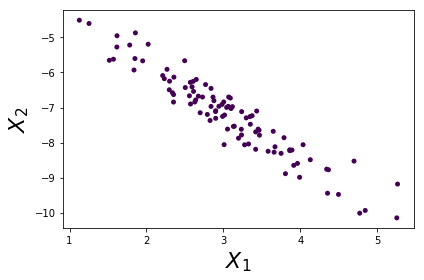

In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=1, n_features=2, random_state=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
print('Size of the data:',X.shape)
plt.scatter(X[:,0],X[:,1],lw=0,marker='.',c=y,s=100)
plt.xlabel('$X_1$',fontsize=22)
plt.ylabel('$X_2$',fontsize=22)
plt.tight_layout()
plt.show()

Before we apply PCA it is important to standardize the data! We use StandardScaler from `sklearn`, as usual. We apply PCA and print the eigenvalues and eigenvectors as well as their shape.

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler().fit(X)   
X_std = scaler.transform(X)
w,v = my_pca(X_std)
print("Eigenvalues (sorted):",w.shape,w)
print("Eigenvectors:",v.shape,v)

k= 1 0.9755143513782871 variance retained
Eigenvalues (sorted): (2,) [1.9510287 0.0489713]
Eigenvectors: (2, 2) [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


We note that the first PCA has retained approximately 98% of the variance. This makes sense because the original data is somehow well correlated. Because it is a 2D example, we can represent the principal components (the directions of the eigenvectors). By construction, these vectors are orthogonals.

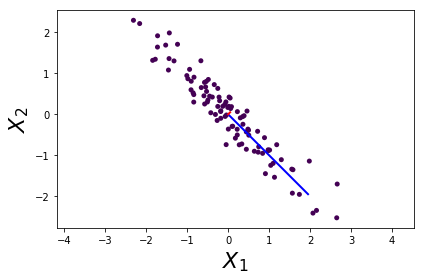

In [33]:
plt.scatter(X_std[:,0],X_std[:,1],lw=0,marker='.',c=y,s=100)

clist = ['b','r']
for i in range(2):
    xfit = np.linspace(0,w[i],100)
    plt.plot(xfit,xfit*v[:,i][1]/v[:,i][0],lw=2,color=clist[i])
plt.axis('equal')
plt.xlabel('$X_1$',fontsize=22)
plt.ylabel('$X_2$',fontsize=22)
plt.tight_layout()
plt.show()

Let's now project the data into the low dimensional space and recover it. Here the reduced dimension K=1 retained 98% of the variance.

In [34]:
K = 1
Z = project_data(X_std,v,K)
print('Shape of Z:',Z.shape)
X_rec = recover_data(Z,v,K)
print('Shape of X_rec',X_rec.shape)

Shape of Z: (100, 1)
Shape of X_rec (100, 2)


Finally we can plot the original data as well as the recovered data.

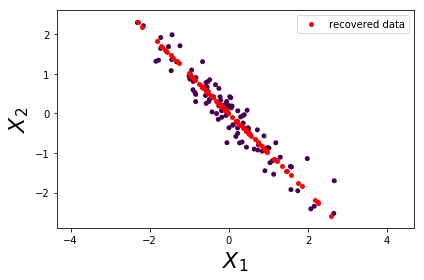

In [39]:
plt.scatter(X_std[:,0],X_std[:,1],lw=0,marker='.',c=y,s=100)
plt.scatter(X_rec[:,0],X_rec[:,1],lw=0,marker='.',c='r',s=100,label='recovered data')
# If you uncomment the following line and wait a minute it will display the projection errors as blue line
#for i in range(X_std.shape[0]): plt.plot([X_std[:,0],X_rec[:,0]],[X_std[:,1],X_rec[:,1]],c='b',lw=0.5)
plt.axis('equal')
plt.xlabel('$X_1$',fontsize=22)
plt.ylabel('$X_2$',fontsize=22)
plt.legend()
plt.tight_layout()
plt.show()

If you wrote the code correctly, you should see how the data projected to the red dots along the principal component.

## 5. Application of PCA to reduce input dimension

We will now apply PCA to reduce the input dimensionality of QM7b dataset and optimize a neural network. Let's load and reshape the data.

In [41]:
from scipy.io import loadmat
qm7 = loadmat('qm7b.mat')

In [42]:
import numpy as np
X0 = qm7['X']
X = X0.reshape(7211,529)
X = np.c_[X]
print(X.shape)

(7211, 529)


In [43]:
y = qm7['T'][:,0]*0.043
y = np.c_[y]
print(y.shape)

(7211, 1)


The code below is a copy from previous lab. It defines a 2-layer neural network with tensorflow. The only modification here is that there is an optional boolean argument to decide whether you want or not to standardize data.

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# Import tensorflow
# If old version uncomment the line below
import tensorflow as tf
# If newer version uncomment the 2 lies below
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior() 

def fit_net(X, y, net_params, std_data=True):
    
    training_epochs,alpha,lmbda,batch_size,display_step,n_hidden_1,n_hidden_2 = net_params
    
    tf.reset_default_graph()
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=21)
    X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size = 0.5,random_state=22)

    # Scale data
    if std_data:
        scaler = MinMaxScaler().fit(X_train)   
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
    
    Y_size, X_size = X_train.shape
    Y_size = 1
    print('Architecture:',X_size, n_hidden_1, n_hidden_2, Y_size)
    
    # Create tf placeholders i.e. variables that we will assign data later 
    X = tf.placeholder("float", [None, X_size], name='features')
    Y = tf.placeholder("float", [None, 1], name='target')
    
    # Initialize weights & biases
    W1 = tf.Variable(tf.truncated_normal([X_size, n_hidden_1], mean=0, stddev=1 / np.sqrt(X_size)), name='weights1')
    b1 = tf.Variable(tf.zeros([n_hidden_1]), name='biases1')
    
    W2 = tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], mean=0, stddev=1 / np.sqrt(X_size)), name='weights2')
    b2 = tf.Variable(tf.zeros([n_hidden_2]), name='biases2')
    
    W_out = tf.Variable(tf.truncated_normal([n_hidden_2, Y_size], mean=0, stddev=1 / np.sqrt(X_size)), name='weights_out')
    b_out = tf.Variable(tf.zeros([Y_size]), name='biases_out')

    # Create model
    def net(x):
        
        layer_1 = tf.add(tf.matmul(x, W1),b1) 
        layer_1 = tf.nn.tanh(layer_1)
        
        layer_2 = tf.add(tf.matmul(layer_1, W2),b2) 
        layer_2 = tf.nn.tanh(layer_2)
        
        out_layer = tf.add(tf.matmul(layer_2, W_out),b_out) 
    
        return out_layer

    # Define loss & optimizer
    loss = tf.sqrt(tf.losses.mean_squared_error(labels = Y, predictions = net(X)))
#    regularizer = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W_out) # L2
    regularizer = tf.reduce_sum(tf.abs(W1)) + tf.reduce_sum(tf.abs(W2)) + tf.reduce_sum(tf.abs(W_out)) # L1
#    sumf = tf.abs(tf.reduce_sum(net(X)))
    loss_op = tf.reduce_mean(loss + lmbda*regularizer)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha)
    train_op = optimizer.minimize(loss_op)

    # Initializing the variables
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        
        total_batch = int(X_train.shape[0]/batch_size)

        # Evaluate RMSE on training & validation sets
        rmse = sess.run(loss,feed_dict={X:X_train,Y:y_train})
        rmse_val = sess.run(loss,feed_dict={X:X_val,Y:y_val})
        print("Epoch {:3d} {:.4f} {:.4f} eV".format(0, rmse, rmse_val))
        
        # Training cycle
        for epoch in range(training_epochs):
            avg_rmse = 0.0  
            # Loop over mini-batches
            for i in range(total_batch):
                offset = i*batch_size
                # Perform SGD
                X_feed = X_train[offset:offset+batch_size]
                y_feed = y_train[offset:offset+batch_size]
                _, rmse = sess.run([train_op, loss], feed_dict={X: X_feed,Y: y_feed})
                avg_rmse += rmse
                
            avg_rmse /= total_batch
            rmse_val = sess.run(loss,feed_dict={X:X_val,Y:y_val})

            if (epoch+1) % display_step == 0:
                print("Epoch {:3d} {:.4f} {:.4f} eV".format(epoch+1, avg_rmse, rmse_val))
    
        # Evaluate & predict on test set
        pred_test = sess.run(net(X), feed_dict={X:X_test})
        rmse_test = sess.run(loss,feed_dict={X:X_test,Y:y_test})
        print("Optimization Finished!")
        print("Error on test set: {:.4f} eV".format(rmse_test))
        
        sess.close()
    
    return y_test, pred_test

We first run the network on the regular data of shape ($m$ = 7211, $n$ = 529).

In [45]:
training_epochs,alpha,lmbda,batch_size,display_step,n_hidden_1,n_hidden_2 = 80,1e-2,1e-4,10,10,100,100
net_params = training_epochs,alpha,lmbda,batch_size,display_step,n_hidden_1,n_hidden_2
y_test, y_predict = fit_net(X,y,net_params)

Architecture: 529 100 100 1
Epoch   0 67.7994 68.1609 eV
Epoch  10 3.1732 3.5466 eV
Epoch  20 2.7025 2.9197 eV
Epoch  30 2.3914 2.6752 eV
Epoch  40 2.2064 2.5569 eV
Epoch  50 2.0944 2.5134 eV
Epoch  60 2.0128 2.5013 eV
Epoch  70 1.9473 2.4953 eV
Epoch  80 1.8936 2.4837 eV
Optimization Finished!
Error on test set: 2.3787 eV


To appreciate the model, we can plot the predicted energies as a function of the actual energies.

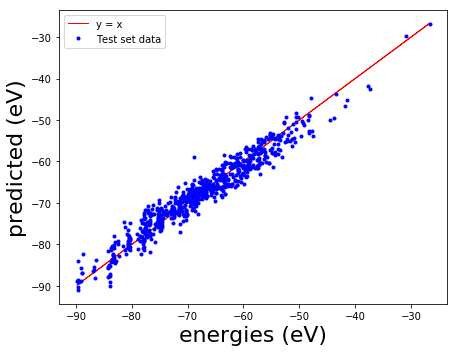

In [46]:
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)

ax1.plot(y_test,y_test,lw=1,color='r',label="y = x")
ax1.plot(y_test,y_predict,marker='.',color='b',lw=0,label="Test set data")

ax1.set_xlabel('energies (eV)',fontsize=22)
ax1.set_ylabel('predicted (eV)',fontsize=22)
plt.legend()
plt.tight_layout()
plt.show()

Now we want to reduce dimensionality of the data. Let first standardize the data.

In [47]:
scaler = StandardScaler().fit(X)   
X_std = scaler.transform(X)

We now apply PCA. Here I just print the shape of the eigenvectors. If you print the retained variance you will see that 90% is retained with only 160 features. 

In [48]:
w,v = my_pca(X_std,print_var=False)
print("Eigenvalues (sorted):",w.shape)
print("Eigenvectors:",v.shape)

Eigenvalues (sorted): (529,)
Eigenvectors: (529, 529)


Let's now transform the data to the low dimensional space $K$=160.

In [49]:
K = 160
Z = project_data(X_std,v,K)

We can now train the network over $Z$.

In [50]:
training_epochs,alpha,lmbda,batch_size,display_step,n_hidden_1,n_hidden_2 = 80,1e-2,1e-4,10,10,100,100
net_params = training_epochs,alpha,lmbda,batch_size,display_step,n_hidden_1,n_hidden_2
y_test, y_predict = fit_net(Z,y,net_params,std_data=False)

Architecture: 160 100 100 1
Epoch   0 67.7916 68.1578 eV
Epoch  10 1.7618 3.0264 eV
Epoch  20 1.2423 3.0091 eV
Epoch  30 0.9714 2.9944 eV
Epoch  40 0.8425 3.0241 eV
Epoch  50 0.7316 3.0509 eV
Epoch  60 0.6691 2.9064 eV
Epoch  70 0.6137 2.9637 eV
Epoch  80 0.5938 2.9666 eV
Optimization Finished!
Error on test set: 2.8660 eV


I obtained an error on the test set of 2.9 eV (this might vary because of the stochastic nature of SGD). This error is comparable to that obtained based on the full feature (3 times larger number of features)! We can finally plot the predicted energies as a function of the actual energies.

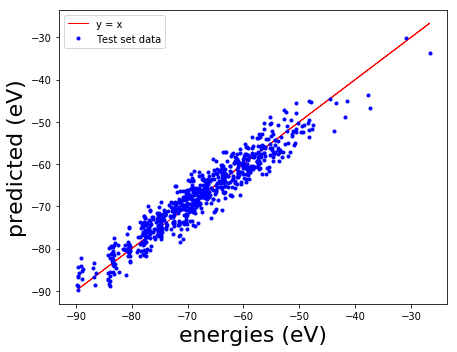

In [51]:
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)

ax1.plot(y_test,y_test,lw=1,color='r',label="y = x")
ax1.plot(y_test,y_predict,marker='.',color='b',lw=0,label="Test set data")

ax1.set_xlabel('energies (eV)',fontsize=22)
ax1.set_ylabel('predicted (eV)',fontsize=22)
plt.legend()
plt.tight_layout()
plt.show()